In [1]:
import tensorflow as tf
from model import Unet
import sys
sys.path.append("../tools")
from pycocotools.coco import COCO
import pycocotools.mask
from utils import img_generator

In [2]:
images_train = img_generator('images_train.json')
images_val = img_generator('images_val.json')

In [3]:
coco = COCO("../annotations/instances_train2014.json")

loading annotations into memory...
Done (t=6.61s)
creating index...
index created!


In [4]:
for image in images_train:
    annotation = coco.loadAnns(ids = [image["id"]])
    break

In [5]:
annotation

[{'segmentation': [[143.48,
    543.49,
    145.88,
    539.41,
    158.83,
    532.45,
    165.07,
    532.93,
    177.07,
    538.69,
    178.75,
    533.41,
    180.91,
    535.33,
    187.39,
    533.17,
    191.71,
    533.41,
    198.43,
    530.77,
    203.95,
    531.01,
    209.22,
    529.57,
    218.58,
    534.85,
    222.18,
    531.25,
    219.78,
    537.73,
    222.18,
    543.97,
    220.74,
    551.89,
    222.18,
    559.81,
    220.26,
    563.41,
    215.46,
    564.13,
    210.66,
    552.61,
    207.3,
    551.41,
    202.75,
    554.77,
    202.51,
    559.81,
    198.43,
    566.29,
    198.67,
    571.57,
    194.83,
    581.64,
    194.59,
    595.8,
    194.35,
    604.92,
    197.23,
    605.64,
    195.55,
    611.64,
    189.31,
    612.84,
    187.63,
    609.0,
    188.35,
    604.68,
    189.31,
    595.56,
    186.67,
    591.72,
    183.31,
    571.81,
    166.03,
    571.33,
    160.27,
    579.0,
    154.51,
    584.28,
    156.67,
    599.88,
    

In [6]:
image

{'id': 57870,
 'file_name': 'COCO_train2014_000000057870.jpg',
 'height': 480,
 'width': 640}

In [7]:
import skimage.io as io
import matplotlib.pyplot as plt

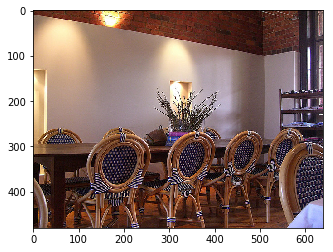

In [8]:
img = io.imread("../train2014/{}".format(image["file_name"]))
plt.imshow(img)

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


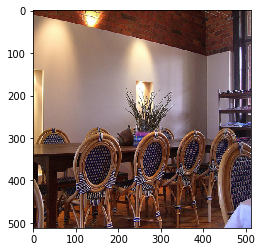

In [9]:
from skimage.transform import resize

img_resized = resize(img, (512,512,3))
plt.imshow(img_resized)

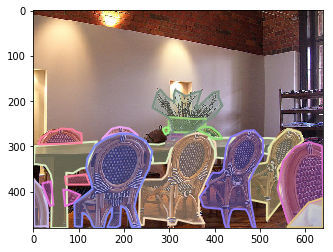

In [11]:
plt.imshow(img)
annIds = coco.getAnnIds(imgIds=image['id'])
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [12]:
anns

[{'segmentation': [[233.29,
    461.42,
    235.35,
    395.35,
    240.52,
    378.84,
    245.68,
    372.65,
    250.84,
    372.65,
    283.87,
    372.65,
    294.19,
    362.32,
    298.32,
    345.81,
    301.42,
    329.29,
    303.48,
    308.65,
    311.74,
    290.06,
    330.32,
    278.71,
    348.9,
    272.52,
    363.35,
    270.45,
    388.13,
    274.58,
    401.55,
    291.1,
    403.61,
    318.97,
    395.35,
    341.68,
    388.13,
    361.29,
    378.84,
    380.9,
    373.68,
    393.29,
    366.45,
    407.74,
    365.42,
    429.42,
    366.45,
    451.1,
    376.77,
    468.65,
    377.81,
    469.68,
    361.29,
    469.68,
    353.03,
    469.68,
    317.94,
    461.42,
    313.81,
    471.74,
    299.35,
    472.77,
    297.29,
    463.48,
    244.65,
    457.29,
    243.61,
    472.77,
    238.45,
    473.81,
    237.42,
    473.81]],
  'area': 21635.5728,
  'iscrowd': 0,
  'image_id': 57870,
  'bbox': [233.29, 270.45, 170.32, 203.36],
  'category_id': 62

In [13]:
annIds

[102924,
 118582,
 290250,
 290659,
 290682,
 290718,
 290760,
 290772,
 290776,
 1154173,
 1594658,
 1600168,
 2128139,
 2132468,
 2143343,
 2143738,
 2190436]

In [14]:
from pycocotools.mask import decode

In [15]:
sample = anns[1]

In [16]:
sample['segmentation'][0]

[4.41,
 338.69,
 27.0,
 342.08,
 38.29,
 361.28,
 41.68,
 378.22,
 39.42,
 480.0,
 75.56,
 479.87,
 73.31,
 357.89,
 87.99,
 359.02,
 104.93,
 348.85,
 117.35,
 346.6,
 137.68,
 293.51,
 141.07,
 289.0,
 3.28,
 299.16,
 1.02,
 339.82]

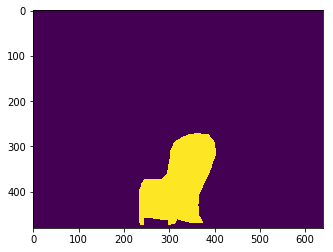

In [24]:
plt.imshow(coco.annToMask(anns[0]))

In [25]:
np.sum(coco.annToMask(anns[0]))

21624

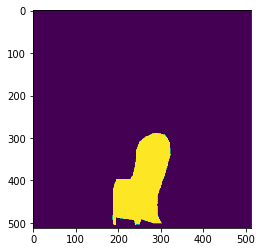

In [22]:
mask_resized = resize(coco.annToMask(anns[0]), (512,512))
plt.imshow(mask_resized)


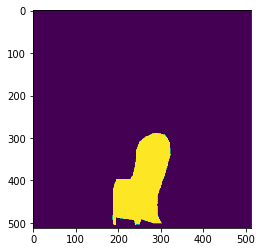

In [23]:
plt.imshow(mask_resized)

In [20]:
import numpy as np

In [17]:
np.shape(coco.annToMask(anns[1]))

(480, 640)

In [18]:
anns[1]

{'segmentation': [[4.41,
   338.69,
   27.0,
   342.08,
   38.29,
   361.28,
   41.68,
   378.22,
   39.42,
   480.0,
   75.56,
   479.87,
   73.31,
   357.89,
   87.99,
   359.02,
   104.93,
   348.85,
   117.35,
   346.6,
   137.68,
   293.51,
   141.07,
   289.0,
   3.28,
   299.16,
   1.02,
   339.82],
  [257.4,
   337.56,
   293.54,
   336.43,
   312.74,
   286.74,
   277.73,
   295.77,
   252.88,
   294.64,
   264.18,
   326.27,
   264.18,
   333.04],
  [400.84,
   324.01,
   400.84,
   308.2,
   388.41,
   282.22,
   386.15,
   282.22,
   444.88,
   279.96,
   426.81,
   296.9,
   425.68,
   314.97,
   423.42,
   326.27],
  [504.74,
   313.84,
   509.26,
   299.16,
   503.61,
   283.35,
   501.35,
   282.22,
   516.04,
   281.09,
   534.11,
   282.22,
   519.42,
   303.68,
   519.42,
   317.23]],
 'area': 15217.232600000001,
 'iscrowd': 0,
 'image_id': 57870,
 'bbox': [1.02, 279.96, 533.09, 200.04],
 'category_id': 67,
 'id': 118582}

In [45]:
catIDs = list(range(1,91))
y = np.zeros((image['height'], image['width'], 90))

for cat in catIDs:
    annIds = coco.getAnnIds(imgIds=image['id'],catIds=[cat])
    anns = coco.loadAnns(annIds)
    if len(anns) > 0:
        for ann in anns:   
            mask = coco.annToMask(ann)
            y[:,:,cat] = np.logical_or(y[:,:,cat], mask).astype(int)

In [30]:
len(annIds)

11

In [47]:
y.shape

(480, 640, 91)

In [34]:
annIds

[102924,
 290250,
 290659,
 290682,
 290718,
 290760,
 290772,
 290776,
 1594658,
 1600168,
 2190436]

In [19]:
x = np.asarray([[0,1,1],[1,0,1]])
y = np.asarray([[0,1,0],[1,1,1]])
z = np.logical_and(x,y)

In [20]:
x

array([[0, 1, 1],
       [1, 0, 1]])

In [21]:
y

array([[0, 1, 0],
       [1, 1, 1]])

In [22]:
z

array([[False,  True, False],
       [ True, False,  True]])

In [24]:
z = z.astype(int)

In [25]:
z

array([[0, 1, 0],
       [1, 0, 1]])